In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
import imblearn
import seaborn as sns

import importlib
import Projet7_utils as utils
importlib.reload(utils)

<module 'Projet7_utils' from 'e:\\Git\\OpenClassrooms_Projet7\\Projet7_utils.py'>

In [27]:
PATH = "E:/OpenClassrooms/Projet7/Data"

df = pd.read_csv(os.path.join(PATH, "application_train.csv"))

In [28]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [29]:
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

## Cleaning, feature engineering

In [30]:
to_drop = [
    'NAME_TYPE_SUITE',
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',
    'OWN_CAR_AGE',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'DAYS_LAST_PHONE_CHANGE',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'EXT_SOURCE_1',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3',
    'OCCUPATION_TYPE'
]

df = df.drop(to_drop, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,0,0,0,0,0,0
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
maybe_drop = [
    'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY',
    'REGION_POPULATION_RELATIVE',
    'FLAG_DOCUMENT_2',
    'FLAG_DOCUMENT_3',
    'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6',
    'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8',
    'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11',
    'FLAG_DOCUMENT_12',
    'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14',
    'FLAG_DOCUMENT_15',
    'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18',
    'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20',
    'FLAG_DOCUMENT_21',
    'APARTMENTS_AVG',
    'BASEMENTAREA_AVG',
    'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BUILD_AVG',
    'COMMONAREA_AVG',
    'ELEVATORS_AVG',
    'ENTRANCES_AVG',
    'FLOORSMAX_AVG',
    'FLOORSMIN_AVG',
    'LANDAREA_AVG',
    'LIVINGAPARTMENTS_AVG',
    'LIVINGAREA_AVG',
    'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG',
    'APARTMENTS_MODE',
    'BASEMENTAREA_MODE',
    'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE',
    'COMMONAREA_MODE',
    'ELEVATORS_MODE',
    'ENTRANCES_MODE',
    'FLOORSMAX_MODE',
    'FLOORSMIN_MODE',
    'LANDAREA_MODE',
    'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE',
    'NONLIVINGAPARTMENTS_MODE',
    'NONLIVINGAREA_MODE',
    'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI',
    'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MEDI',
    'COMMONAREA_MEDI',
    'ELEVATORS_MEDI',
    'ENTRANCES_MEDI',
    'FLOORSMAX_MEDI',
    'FLOORSMIN_MEDI',
    'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI',
    'LIVINGAREA_MEDI',
    'NONLIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_MEDI',
    'TOTALAREA_MODE',
    'FONDKAPREMONT_MODE',
    'WALLSMATERIAL_MODE',
    'HOUSETYPE_MODE',
    'EMERGENCYSTATE_MODE'
]

df = df.drop(maybe_drop, axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Secondary / secondary special,Single / not married,House / apartment,-9461,-637,1,0,1.0,Business Entity Type 3,No
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Higher education,Married,House / apartment,-16765,-1188,1,0,2.0,School,No
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Secondary / secondary special,Single / not married,House / apartment,-19046,-225,1,0,1.0,Government,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Secondary / secondary special,Civil marriage,House / apartment,-19005,-3039,1,0,2.0,Business Entity Type 3,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Secondary / secondary special,Single / not married,House / apartment,-19932,-3038,1,0,1.0,Religion,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,Secondary / secondary special,Separated,With parents,-9327,-236,1,0,1.0,Services,No
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,Secondary / secondary special,Widow,House / apartment,-20775,365243,1,0,1.0,XNA,No
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,Higher education,Separated,House / apartment,-14966,-7921,1,1,1.0,School,No
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,Secondary / secondary special,Married,House / apartment,-11961,-4786,1,0,2.0,Business Entity Type 1,No


In [32]:
ind = df.loc[df['AMT_ANNUITY'].isna()].index
df = df.drop(ind, axis=0)

ind = df.loc[df['CNT_FAM_MEMBERS'].isna()].index
df = df.drop(ind, axis=0)

ind = df.loc[df['AMT_GOODS_PRICE'].isna()].index
df = df.drop(ind, axis=0)

In [33]:
df['INCOME_CREDIT_RATE'] = df['AMT_INCOME_TOTAL'] / df['AMT_CREDIT']
df['ANNUITY_INCOME_RATE'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']

In [34]:
df['CODE_GENDER'].unique()

array(['M', 'F', 'XNA'], dtype=object)

In [35]:
ind = df.loc[df['CODE_GENDER']=='XNA'].index
df = df.drop(ind, axis=0)

In [36]:
ind = df.loc[df['CNT_CHILDREN']>5].index
df = df.drop(ind, axis=0)

In [37]:
L1 = df.loc[df['ORGANIZATION_TYPE']=='XNA']['ORGANIZATION_TYPE'].index
L2 = df.loc[df['DAYS_EMPLOYED']==365243]['DAYS_EMPLOYED'].index

utils.diff_lists(L1, L2)

([], [])

In [38]:
ind = df.loc[df['DAYS_EMPLOYED']==365243].index
df = df.drop(ind, axis=0)

In [39]:
"""importlib.reload(utils)

list_cat_to_binary = [
    'NAME_CONTRACT_TYPE',
    'CODE_GENDER',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'EMERGENCYSTATE_MODE'
]

for i in list_cat_to_binary:
    df[i] = utils.cat_to_binary(df[i])"""

"importlib.reload(utils)\n\nlist_cat_to_binary = [\n    'NAME_CONTRACT_TYPE',\n    'CODE_GENDER',\n    'FLAG_OWN_CAR',\n    'FLAG_OWN_REALTY',\n    'EMERGENCYSTATE_MODE'\n]\n\nfor i in list_cat_to_binary:\n    df[i] = utils.cat_to_binary(df[i])"

In [40]:
df = df.set_index('SK_ID_CURR')

In [41]:
df.isnull().sum().sort_values(ascending=False).head()

EMERGENCYSTATE_MODE    118690
TARGET                      0
NAME_CONTRACT_TYPE          0
ANNUITY_INCOME_RATE         0
INCOME_CREDIT_RATE          0
dtype: int64

In [42]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,-9461,-637,1,0,1.0,Business Entity Type 3,No,0.498036,0.121978,0.060749
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,-16765,-1188,1,0,2.0,School,No,0.208736,0.132217,0.027598
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,-19046,-225,1,0,1.0,Government,NaN,0.500000,0.100000,0.050000
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,-19005,-3039,1,0,2.0,Business Entity Type 3,NaN,0.431748,0.219900,0.094941
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,-19932,-3038,1,0,1.0,Religion,NaN,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,-16705,-7258,1,0,1.0,Self-employed,NaN,0.460954,0.105206,0.048495
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,-9327,-236,1,0,1.0,Services,No,0.618375,0.174971,0.108198
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,-14966,-7921,1,1,1.0,School,No,0.225776,0.195941,0.044239


In [43]:
"""#days_employed = 365243 =outliers, replace to mean
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].mean())"""

"#days_employed = 365243 =outliers, replace to mean\ndf['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].replace(365243, np.nan)\ndf['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].fillna(df['DAYS_EMPLOYED'].mean())"

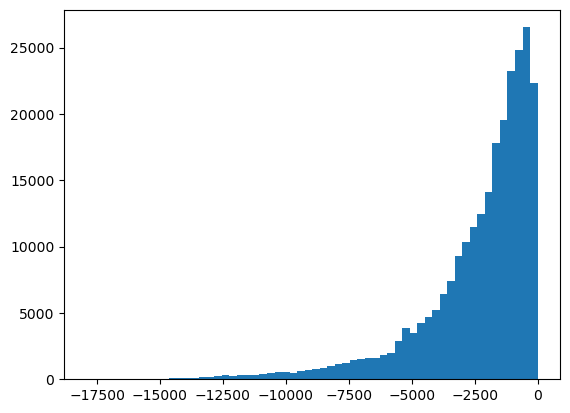

In [44]:
plt.hist(df['DAYS_EMPLOYED'], bins=60)
plt.show()

In [45]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,-9461,-637,1,0,1.0,Business Entity Type 3,No,0.498036,0.121978,0.060749
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,-16765,-1188,1,0,2.0,School,No,0.208736,0.132217,0.027598
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,-19046,-225,1,0,1.0,Government,NaN,0.500000,0.100000,0.050000
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,-19005,-3039,1,0,2.0,Business Entity Type 3,NaN,0.431748,0.219900,0.094941
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,-19932,-3038,1,0,1.0,Religion,NaN,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,-16705,-7258,1,0,1.0,Self-employed,NaN,0.460954,0.105206,0.048495
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,-9327,-236,1,0,1.0,Services,No,0.618375,0.174971,0.108198
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,-14966,-7921,1,1,1.0,School,No,0.225776,0.195941,0.044239


## Outliers

In [46]:
df.columns.tolist()

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE',
 'INCOME_CREDIT_RATE',
 'ANNUITY_INCOME_RATE',
 'PAYMENT_RATE']

In [47]:
List_mean = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'INCOME_CREDIT_RATE',
    'ANNUITY_INCOME_RATE',
    'PAYMENT_RATE'    
]

In [48]:
importlib.reload(utils)

for i in List_mean:
    df[i] = utils.set_outlier_nan(df[i])

df[List_mean] = utils.imput(df, List_mean, 'mean')

e:\Git\OpenClassrooms_Projet7\Projet7_utils.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series.iloc[i]=float('nan')  #set to NaN


In [49]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,-9461,-637,1,0,1.0,Business Entity Type 3,No,0.498036,0.121978,0.060749
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,-16765,-1188,1,0,2.0,School,No,0.208736,0.132217,0.027598
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,-19046,-225,1,0,1.0,Government,NaN,0.500000,0.100000,0.050000
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,-19005,-3039,1,0,2.0,Business Entity Type 3,NaN,0.431748,0.219900,0.094941
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,-19932,-3038,1,0,1.0,Religion,NaN,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,225000.0,...,-16705,-7258,1,0,1.0,Self-employed,NaN,0.460954,0.105206,0.048495
456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,-9327,-236,1,0,1.0,Services,No,0.618375,0.174971,0.050597
456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,-14966,-7921,1,1,1.0,School,No,0.225776,0.195941,0.044239


In [50]:
df.isnull().sum().sort_values(ascending=False).head()

EMERGENCYSTATE_MODE    118690
TARGET                      0
NAME_CONTRACT_TYPE          0
ANNUITY_INCOME_RATE         0
INCOME_CREDIT_RATE          0
dtype: int64

# Correlations

<AxesSubplot:>

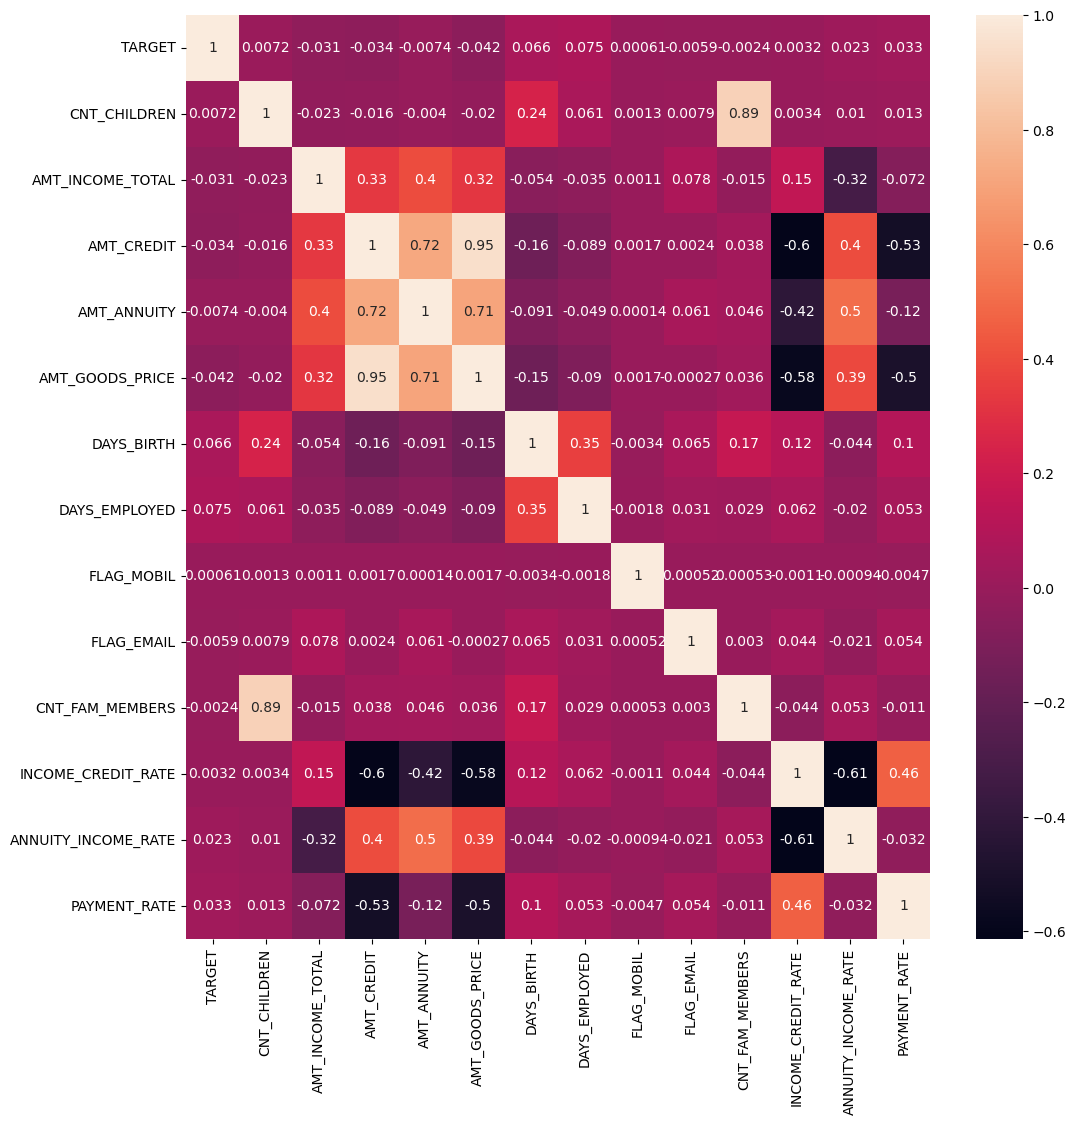

In [51]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

# Preprocess data
# categorize data

In [52]:
importlib.reload(utils)

list_cat = [i for i in df.columns.tolist() if df[i].dtypes=='O']
df = utils.categorize(df, list_cat)

In [53]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_EMAIL,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE,INCOME_CREDIT_RATE,ANNUITY_INCOME_RATE,PAYMENT_RATE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,-9461,-637,1,0,1.0,5,0,0.498036,0.121978,0.060749
100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,-16765,-1188,1,0,2.0,39,0,0.208736,0.132217,0.027598
100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,-19046,-225,1,0,1.0,11,2,0.500000,0.100000,0.050000
100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,-19005,-3039,1,0,2.0,5,2,0.431748,0.219900,0.094941
100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,-19932,-3038,1,0,1.0,37,2,0.236842,0.179963,0.042623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456248,0,0,0,0,1,0,153000.0,331920.0,16096.5,225000.0,...,-16705,-7258,1,0,1.0,42,2,0.460954,0.105206,0.048495
456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,225000.0,...,-9327,-236,1,0,1.0,43,0,0.618375,0.174971,0.050597
456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,585000.0,...,-14966,-7921,1,1,1.0,39,0,0.225776,0.195941,0.044239


# Test logistic reg - new

In [54]:
df_try = df.copy()
df_try['TARGET'].value_counts()

0    230019
1     21807
Name: TARGET, dtype: int64

In [55]:
importlib.reload(utils)
df_try['TARGET'] = utils.set_0_to_1(df_try['TARGET'])

In [56]:
df_try['TARGET'].value_counts()

1    230019
0     21807
Name: TARGET, dtype: int64

In [57]:
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

"""beta = .5
error_fn = utils.score_func
custom_error_func = make_scorer(error_fn, beta=beta, greater_is_better=True)

X = df_try.drop('TARGET', axis=1)
y = df_try['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


model_try = imbpipe(steps=[
    ('OverSampling', RandomOverSampler(sampling_strategy=.5, random_state=42)),
    ('UnderSampling', RandomUnderSampler(sampling_strategy=1, random_state=42)),
    ('Scaling', StandardScaler()),
    ('classification', LogisticRegression())
])

#X_res, y_res = model_try.fit(X_train, y_train)

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [50, 100, 200]
}

LogReg_try = GridSearchCV(
    model_try,
    param_grid=par_grid,
    scoring=custom_error_func,
    verbose=1,
    n_jobs=4
    )

LogReg_try.fit(X_train, y_train)

#X_train"""

"""print('Best hyperparams: ', LogReg_try.best_params_)
print('Best mean score: ', LogReg_try.best_score_)
print('std: ', LogReg_try.cv_results_['std_test_score'][LogReg_try.best_index_])

LogReg_predict = LogReg_try.predict(X_test)
utils.score_func(y_test.values, LogReg_predict, beta=beta)"""

"print('Best hyperparams: ', LogReg_try.best_params_)\nprint('Best mean score: ', LogReg_try.best_score_)\nprint('std: ', LogReg_try.cv_results_['std_test_score'][LogReg_try.best_index_])\n\nLogReg_predict = LogReg_try.predict(X_test)\nutils.score_func(y_test.values, LogReg_predict, beta=beta)"

In [58]:
from sklearn.metrics import make_scorer

beta = .5

error_fn = utils.score_func
custom_error_func = make_scorer(error_fn, beta=beta, greater_is_better=True)

importlib.reload(utils)
from sklearn.metrics import roc_auc_score

X = df_try.drop('TARGET', axis=1)
y = df_try['TARGET']

classifier = LogisticRegression()

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [50, 100, 200]
}

LogReg, X_test, y_test = utils.train_try(X, y, classifier, par_grid, custom_error_func)

LogReg_predict = LogReg.predict(X_test.values)
#print("AUROC: ", roc_auc_score(y_test, LogReg_predict))
utils.score_func(y_test.values, LogReg_predict, beta=beta)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparams:  {'classification__C': 2.575, 'classification__max_iter': 50, 'classification__tol': 1e-05}
Best mean score:  0.8394637514598685
std:  0.0013502729865819785
Total count:  50366
Correctly predicted as able to pay : 26532 / 45940
Predicted as unable to pay, but able in reality : 19408
Correctly predicted as unable to pay : 2851 / 4426
Predicted as able to pay, but unable in reality : 1575
beta:  0.5
fbeta score:  0.837669226106284


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.837669226106284

In [59]:
utils.score_func(y_test.values, LogReg_predict, beta=beta)

Total count:  50366
Correctly predicted as able to pay : 26532 / 45940
Predicted as unable to pay, but able in reality : 19408
Correctly predicted as unable to pay : 2851 / 4426
Predicted as able to pay, but unable in reality : 1575
beta:  0.5
fbeta score:  0.837669226106284


0.837669226106284

# Preprocess data - old

In [25]:
#importlib.reload(utils)

#X = df.drop('TARGET', axis=1)
#y = df['TARGET']

#X_train, X_test, y_train, y_test = utils.preprocess_data(X, y, list_cat_other)

NameError: name 'X' is not defined

In [32]:
X_train

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,...,ORGANIZATION_TYPE:Legal Services,ORGANIZATION_TYPE:Advertising,ORGANIZATION_TYPE:Trade: type 5,ORGANIZATION_TYPE:Cleaning,ORGANIZATION_TYPE:Industry: type 13,ORGANIZATION_TYPE:Trade: type 4,ORGANIZATION_TYPE:Telecom,ORGANIZATION_TYPE:Industry: type 8,ORGANIZATION_TYPE:Realtor,ORGANIZATION_TYPE:Industry: type 6
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
134315,-0.322679,0.720987,-0.717607,-0.663095,3.619076,-1.389683,1.244719,0.295836,0.820347,0.426651,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
271769,-0.322679,0.720987,-0.717607,1.508081,-0.580787,-0.309462,-1.184161,-1.595399,-1.163196,-1.659680,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.602304
131942,-0.322679,-1.386988,-0.717607,1.508081,0.819168,0.770760,0.928498,0.310734,0.677532,0.054968,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
168869,3.099052,-1.386988,1.393521,-0.663095,2.219122,1.850982,0.685597,1.204583,1.137714,-0.584529,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
409669,-0.322679,0.720987,-0.717607,-0.663095,-0.580787,-0.309462,0.728073,-0.230790,0.709268,-1.238700,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,2.602304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239157,-0.322679,-1.386988,1.393521,-0.663095,0.819168,0.050612,-1.179106,-1.192422,-1.274275,0.214784,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
400259,-0.322679,0.720987,1.393521,1.508081,-0.580787,-0.813565,2.232983,0.848905,-0.001295,1.295668,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
253168,-0.322679,0.720987,-0.717607,-0.663095,0.819168,0.050612,0.298750,0.550956,0.661663,0.493375,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000


In [204]:
y_test

SK_ID_CURR
367569    0
325887    1
239944    0
329047    0
198574    0
         ..
429170    0
386218    1
360473    0
385531    0
403199    0
Name: TARGET, Length: 61435, dtype: int64

## Dummy classifier

In [113]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)

dummy_predict = dummy_clf.predict(X_test.values)
print("Accuracy: ", dummy_clf.score(dummy_predict, y_test))
print("AUROC: ", roc_auc_score(y_test, dummy_predict))

Accuracy:  0.9192317083095956
AUROC:  0.5


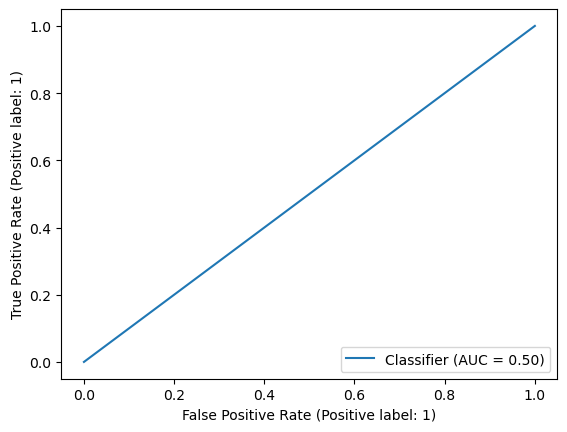

In [114]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, dummy_predict)

# Logistic regression - AUC - old

In [116]:
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#smote = SMOTE(random_state=42)
#X_train_smote, y_train_smote = smote.fit_resample(X_train.values, y_train.ravel())

model_smote = imbpipe(steps=[
    ('sampling', SMOTE()),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [50, 100, 200]
}

LogReg_smote = utils.train_model(model_smote, par_grid, X_train, y_train, 'roc_auc')
LogReg_smote_predict = LogReg_smote.predict(X_test.values)
print("AUROC: ", roc_auc_score(y_test, LogReg_smote_predict))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparams:  {'classification__C': 10.0, 'classification__max_iter': 100, 'classification__tol': 0.001}
Best mean score:  0.6500204041881253
std:  0.0021530975914475685
AUROC:  0.6081000831114158


In [91]:
(y_test==0).count()

61435

In [88]:
y_test

SK_ID_CURR
367569    0
325887    1
239944    0
329047    0
198574    0
         ..
429170    0
386218    1
360473    0
385531    0
403199    0
Name: TARGET, Length: 61435, dtype: int64

## Logistic regression - Random under sampling


In [117]:
importlib.reload(utils)
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

model_LogReg_under = imbpipe(steps=[
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [300, 400, 500]
}

LogReg_under = utils.train_model(model_LogReg_under, par_grid, X_train, y_train, 'roc_auc')
LogReg_under_predict = LogReg_under.predict(X_test.values)
print("AUROC: ", roc_auc_score(y_test, LogReg_under_predict))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparams:  {'classification__C': 0.1, 'classification__max_iter': 300, 'classification__tol': 1e-05}
Best mean score:  0.6522294705578839
std:  0.001707954040080557
AUROC:  0.6090707327631636


## Logistic regression - Random over sampling

In [118]:
importlib.reload(utils)
from imblearn.over_sampling import RandomOverSampler

model_LogReg_over = imbpipe(steps=[
    ('sampling', RandomOverSampler(random_state=42)),
    ('classification', LogisticRegression())
    ])

par_grid = {
    'classification__tol': np.logspace(-5, -2, 4),
    'classification__C': np.linspace(0.1, 10, 5),
    'classification__max_iter': [300, 400, 500]
}

LogReg_over = utils.train_model(model_LogReg_over, par_grid, X_train, y_train, 'roc_auc')
LogReg_over_predict = LogReg_over.predict(X_test.values)
print("AUROC: ", roc_auc_score(y_test, LogReg_over_predict))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best hyperparams:  {'classification__C': 7.525, 'classification__max_iter': 300, 'classification__tol': 1e-05}
Best mean score:  0.653110308364863
std:  0.0022286471094698757
AUROC:  0.6095429258968305


# Random Forest - AUC - old

In [119]:
importlib.reload(utils)
from sklearn.ensemble import RandomForestClassifier

model_rf = imbpipe(steps=[
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classification', RandomForestClassifier(random_state=42))
])

par_grid = {
    'classification__max_depth': [10, 25, 50, 100],
    'classification__min_samples_split': [2, 3, 5],
    'classification__max_features': ['sqrt', 'log2'],
    'classification__min_samples_leaf': [1, 3, 5, 10]
}

rf = utils.train_model(model_rf, par_grid, X_train, y_train, 'roc_auc')
rf_predict = rf.predict(X_test.values)
print("AUROC: ", roc_auc_score(y_test, rf_predict))

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best hyperparams:  {'classification__max_depth': 50, 'classification__max_features': 'sqrt', 'classification__min_samples_leaf': 10, 'classification__min_samples_split': 2}
Best mean score:  0.6723696685717295
std:  0.002249616776757599
AUROC:  0.6254485143346405


# XGBoost - AUC - old

In [125]:
importlib.reload(utils)
from xgboost import XGBClassifier

model_xgb = imbpipe(steps=[
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classification', XGBClassifier(n_estimators=100, random_state=42))
])

par_grid = {
    'classification__max_depth': [5, 10, 15, 30, 50],
    'classification__learning_rate': [.01, .05, .1, .2, .3, .5],
    'classification__colsample_bytree': [.5, .66, .75, 1]
}

xgb = utils.train_model(model_xgb, par_grid, X_train, y_train, 'roc_auc')
xgb_predict = xgb.predict(X_test.values)
print("AUROC: ", roc_auc_score(y_test, xgb_predict))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best hyperparams:  {'classification__colsample_bytree': 0.66, 'classification__learning_rate': 0.2, 'classification__max_depth': 5}
Best mean score:  0.6933710803150815
std:  0.0025873684062438654
AUROC:  0.6433767598635505


# Test custom metric stupid

In [288]:
def stupid_scorer(y_true, y_pred):
    
    return np.mean(np.square(y_true - y_pred))


rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

score = make_scorer(stupid_scorer, greater_is_better=False)

par_grid = {
    #'classification__max_depth': [10, 25, 50, 100],
    #'classification__min_samples_split': [2, 3, 5],
    'max_features': ['sqrt', 'log2'],
    #'classification__min_samples_leaf': [1, 3, 5, 10]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(),
    param_grid=par_grid,
    cv=5,
    scoring=score,
    n_jobs=4,
    verbose=1,
    error_score='raise'
)

rf_grid.fit(X_res.values, y_res.values)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=4, param_grid={'max_features': ['sqrt', 'log2']},
             scoring=make_scorer(stupid_scorer, greater_is_better=False),
             verbose=1)

In [289]:
predict_stupid = rf_grid.predict(X_test)
print(score_func2(y_test, predict_stupid))

e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
A : 35511
B : 1947
C : 20962
D : 3015
0.09359485635224223


In [290]:
print('Best hyperparams: ', rf_grid.best_params_)
print('Best mean score: ', rf_grid.best_score_)
print('std: ', rf_grid.cv_results_['std_test_score'][rf_grid.best_index_])

Best hyperparams:  {'max_features': 'sqrt'}
Best mean score:  -0.38529211640811695
std:  0.00613547053757242


# Custom metric - Old

### Random Forest

In [34]:
importlib.reload(utils)
from sklearn.metrics import make_scorer

error_fn = utils.score_func

custom_error_func = make_scorer(error_fn, greater_is_better=False)

In [291]:
importlib.reload(utils)
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import make_scorer

#error_fn = utils.score_func

#score = make_scorer(error_fn, greater_is_better=False)

model_rf = imbpipe(steps=[
    ('sampling', RandomUnderSampler(random_state=42)),
    ('classification', RandomForestClassifier(random_state=42))
])


par_grid = {
    'classification__max_depth': [10, 25, 50],
    'classification__min_samples_split': [2, 3, 5],
    'classification__max_features': ['sqrt', 'log2'],
    'classification__min_samples_leaf': [1, 3, 5]
}
rf_custom = utils.train_model(model_rf, par_grid, X_train, y_train, custom_error_func)
rf_custom_predict = rf_custom.predict(X_test.values)
print(utils.score_func(y_test, rf_custom_predict))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best hyperparams:  {'classification__max_depth': 25, 'classification__max_features': 'sqrt', 'classification__min_samples_leaf': 5, 'classification__min_samples_split': 2}
Best mean score:  -0.09088630259623993
std:  0.00023075140343763217
A : 36283
B : 1948
C : 20190
D : 3014
0.09109465288516318


In [292]:
importlib.reload(utils)
print(utils.score_func(y_test, rf_custom_predict))

A : 36283
B : 1948
C : 20190
D : 3014
0.09109465288516318


In [293]:
print('Best hyperparams: ', rf_custom.best_params_)
print('Best mean score: ', rf_custom.best_score_)
print('std: ', rf_custom.cv_results_['std_test_score'][rf_custom.best_index_])

Best hyperparams:  {'classification__max_depth': 25, 'classification__max_features': 'sqrt', 'classification__min_samples_leaf': 5, 'classification__min_samples_split': 2}
Best mean score:  -0.09088630259623993
std:  0.00023075140343763217


### XGBoost

In [148]:
importlib.reload(utils)
from imblearn.pipeline import Pipeline as imbpipe
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

custom_error_func = make_scorer(utils.score_func, greater_is_better=False)


model_xgb = imbpipe(steps=[
    ('sampling', SMOTE()),
    ('classification', XGBClassifier(n_estimators=100, random_state=42))
])

"""par_grid = {
    'classification__max_depth': [8, 10, 15],
    'classification__learning_rate': [.2, .25, .3],
    'classification__colsample_bytree': [.7, .75, .8]
}"""

par_grid = {
    'classification__max_depth': [12],
    'classification__learning_rate': [.35],
    'classification__colsample_bytree': [.4, .45, .5]
}

xgb_custom = utils.train_model(model_xgb, par_grid, X_train, y_train, custom_error_func)
xgb_custom_predict = xgb_custom.predict(X_test.values)

utils.score_func(y_test.values, xgb_custom_predict)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best hyperparams:  {'classification__colsample_bytree': 0.45, 'classification__learning_rate': 0.35, 'classification__max_depth': 12}
Best mean score:  -0.06841117865048797
std:  0.0007545282896022214
Total count:  61435
Correctly predicted as able to pay : 56300 / 56473
Predicted as unable to pay, but able in reality : 173 / 56473
Correctly predicted as unable to pay : 69 / 4962
Predicted as able to pay, but unable in reality : 4893 / 4962
Weighted error:  0.0659318942890052


0.0659318942890052

# TEST New Function

In [61]:
X = df_try.drop('TARGET', axis=1)
y = df_try['TARGET']

In [63]:
from imblearn.pipeline import Pipeline as imbpipe
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import make_scorer, fbeta_score

from xgboost import XGBClassifier
importlib.reload(utils)

beta = .1
scoring_fn = utils.score_func
custom_scoring_func = make_scorer(scoring_fn, beta=beta, greater_is_better=True)

classifier = XGBClassifier(n_estimators=80, random_state=42)

par_grid = {
    'classification__max_depth': [3],
    'classification__learning_rate': [.25, .3, .35],
    'classification__colsample_bytree': [.65, .68, .7]
}

xgb, X_test, y_test = utils.train_try(X, y, classifier, par_grid, custom_scoring_func)

xgb_predict = xgb.predict(X_test.values)
utils.score_func(y_test.values, xgb_predict, beta=beta)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best hyperparams:  {'classification__colsample_bytree': 0.7, 'classification__learning_rate': 0.3, 'classification__max_depth': 3}
Best mean score:  0.9460394579927162
std:  0.0014652597882057437
Total count:  50366
Correctly predicted as able to pay : 29815 / 45940
Predicted as unable to pay, but able in reality : 16125
Correctly predicted as unable to pay : 2839 / 4426
Predicted as able to pay, but unable in reality : 1587
beta:  0.1
fbeta score:  0.9451295297758416


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0.9451295297758416

In [64]:
from sklearn.ensemble import RandomForestClassifier
importlib.reload(utils)

beta = .2
scoring_fn = utils.score_func
custom_scoring_func = make_scorer(scoring_fn, beta=beta, greater_is_better=True)

classifier = RandomForestClassifier(n_estimators=75, random_state=42)

par_grid = {
    'classification__max_depth': [2, 3, 5],
    'classification__min_samples_split': [2, 3],
    'classification__max_features': ['sqrt'],
    'classification__min_samples_leaf': [2, 3, 4]
}

rf, X_test, y_test = utils.train_try(X, y, classifier, par_grid, custom_scoring_func)

rf_predict = rf.predict(X_test.values)
utils.score_func(y_test.values, rf_predict, beta=beta)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best hyperparams:  {'classification__max_depth': 5, 'classification__max_features': 'sqrt', 'classification__min_samples_leaf': 2, 'classification__min_samples_split': 2}
Best mean score:  0.9265720937218986
std:  0.00161627376485642


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Total count:  50366
Correctly predicted as able to pay : 28375 / 45940
Predicted as unable to pay, but able in reality : 17565
Correctly predicted as unable to pay : 2734 / 4426
Predicted as able to pay, but unable in reality : 1692
beta:  0.2
fbeta score:  0.9249449922581698


0.9249449922581698

# Feature importance

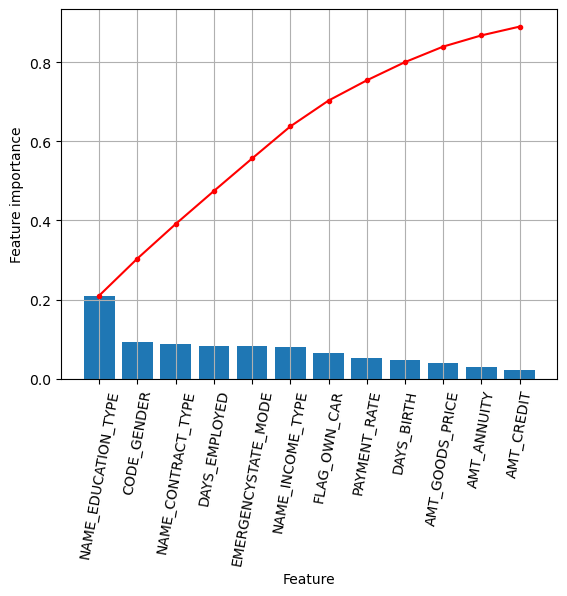

In [65]:
xgb_best = xgb.best_estimator_

importance_xgb = pd.DataFrame.from_dict({
    'name': X.columns.to_list(),
    'feature_imp': xgb_best.named_steps['classification'].feature_importances_
})

importance_xgb = importance_xgb.sort_values(by=['feature_imp'], ascending=False)
cumul_importance = np.cumsum(importance_xgb['feature_imp'].head(12))

#fig, ax = plt.figure(figsize=(10,8))

plt.bar(importance_xgb['name'].head(12), importance_xgb['feature_imp'].head(12))
plt.plot(importance_xgb['name'].head(12), cumul_importance, marker='.', c='r')

plt.xlabel('Feature')
plt.ylabel('Feature importance')
plt.xticks(ticks=np.linspace(0, 11, 12), labels=importance_xgb['name'].head(12), rotation=80)
plt.grid()

plt.show()

In [90]:
import lime
from lime import lime_tabular
import random
idx = random.choice(X_test.index)



explainer = lime_tabular.LimeTabularExplainer(
    X_test.values,
    mode='classification',
    feature_names=X_test.columns.to_list(),
    class_names=list(y_test.unique())
)

print("Prediction : ", xgb.predict(X_test.loc[idx].values.reshape(1, -1)))
print("Actual :     ", y_test[idx])

explanation = explainer.explain_instance(
    X_test.loc[idx],
    xgb.predict_proba,
    num_features=10
)

explanation.show_in_notebook()

e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Prediction :  [1]
Actual :      1


e:\Anaconda\envs\projet7\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
X_test.loc[idx]

NAME_CONTRACT_TYPE          0.000000
CODE_GENDER                 1.000000
FLAG_OWN_CAR                1.000000
FLAG_OWN_REALTY             1.000000
CNT_CHILDREN                0.000000
AMT_INCOME_TOTAL       202500.000000
AMT_CREDIT             671652.000000
AMT_ANNUITY             49005.000000
AMT_GOODS_PRICE        607500.000000
NAME_INCOME_TYPE            6.000000
NAME_EDUCATION_TYPE         4.000000
NAME_FAMILY_STATUS          1.000000
NAME_HOUSING_TYPE           1.000000
DAYS_BIRTH             -14922.000000
DAYS_EMPLOYED            -294.000000
FLAG_MOBIL                  1.000000
FLAG_EMAIL                  1.000000
CNT_FAM_MEMBERS             2.000000
ORGANIZATION_TYPE           5.000000
EMERGENCYSTATE_MODE         2.000000
INCOME_CREDIT_RATE          0.301495
ANNUITY_INCOME_RATE         0.242000
PAYMENT_RATE                0.072962
Name: 155227, dtype: float64

In [88]:
y_test.value_counts()

1    45940
0     4426
Name: TARGET, dtype: int64